In [233]:
import json
import numpy as np
from collections import defaultdict, Counter
import string
from sklearn import linear_model
import sys
import nltk
import random
from nltk.corpus import stopwords 
import matplotlib.pyplot as plt
import matplotlib

In [147]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/mhy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [148]:
import spacy

In [149]:
f_name = "Software.json"
all_data = []
with open(f_name, 'r') as f:
    line = f.readline()
    #print(line)
    while line:
        data = json.loads(line)
        all_data.append(data)
        line = f.readline()

In [150]:
print(all_data[0])
print(len(all_data))

{'overall': 4.0, 'verified': True, 'reviewTime': '03 11, 2014', 'reviewerID': 'A240ORQ2LF9LUI', 'asin': '0077613252', 'style': {'Format:': ' Loose Leaf'}, 'reviewerName': 'Michelle W', 'reviewText': "The materials arrived early and were in excellent condition.  However for the money spent they really should've come with a binder and not just loose leaf.", 'summary': 'Material Great', 'unixReviewTime': 1394496000}
459436


In [151]:
for i in all_data:
    if 'reviewText' not in i.keys() or 'overall' not in i.keys() or not i['reviewText'] or not i['overall']:
        all_data.remove(i)

In [154]:
all_data = random.choices(all_data, k=60000)
print(len(all_data))

60000


In [155]:
def only_adj_and_noun(all_data):
    bigramCount = defaultdict(int)
    uniCount = defaultdict(int)
    punctuation = set(string.punctuation)
    stop_words = set(stopwords.words('english'))
    translator = str.maketrans('', '', string.punctuation)
    nlp = spacy.load("en_core_web_sm")

    review_text = []
    for idx, d in enumerate(all_data):
        if idx % 1000 == 0:
            print(idx)
        #r = ''.join([c for c in d['reviewText'].lower() if not c in discard_set])
        r = d['reviewText'].translate(translator).lower()
        doc = nlp(r)
        r = [word.text for word in doc if word.text not in stop_words and not word.text.isdigit() and 
             word.pos_ in ("NOUN", "ADJ")]
        review_text.append(" ".join(r))
        if r:
            prev = r[0]
            for i in range(1, len(r)):
                bigram = prev + " " + r[i]
                uniCount[r[i]] += 1
                bigramCount[bigram] += 1
                prev = r[i]
            uniCount[r[0]] += 1
    return uniCount, bigramCount, review_text

In [156]:
uni_count, bi_count, review_text = only_adj_and_noun(all_data)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000


In [159]:
print(len(bi_count), len(uni_count))

646110 44527


In [160]:
def feature(text, bigrams, bigramId):
    feat = [0]*len(bigrams)
    words = text.split()
    for i in range(len(words)-1):
        bigram = words[i] + " " + words[i+1]
        try:
            feat[bigramId[bigram]] += 1
        except KeyError:
            continue
    feat.append(1) #offset
    return feat

In [161]:
countsBigram = [(bi_count[d], d) for d in bi_count.keys()]
countsBigram.sort()
countsBigram.reverse()

In [162]:
bigrams = [c[1] for c in countsBigram[:1000]]
bigramId = dict(zip(bigrams, range(len(bigrams))))
bigramSet = set(bigrams)

In [163]:
print(review_text[1])

terrible trial selection tool work window problem many times compatibility test options money middle big project problem


In [164]:
X_2 = []
for i in range(len(all_data)):
    X_2.append(feature(review_text[i], bigrams, bigramId))
y_2 = [d['overall'] for d in all_data]

In [165]:
reg = 1.0
clf_bi = linear_model.Ridge(reg, fit_intercept=False)
clf_bi.fit(X_2, y_2)
theta_bi = clf_bi.coef_
pred_bi = clf_bi.predict(X_2)

In [268]:
max_index = np.argsort(theta_bi)[-300:][::-1]
max_index = max_index[1:]
#print(max_index)
#print(theta_bi[max_index])
#print(np.array(bigrams)[max_index - 1])
tmp_bigram = np.array(bigrams)[max_index]
tmp_pair = {bigrams[i]: theta_bi[i] for i in max_index}

#print(tmp_pair["bad product"])
print(tmp_bigram)

['great app' 'taxes easy' 'pleased purchase' 'excellent product'
 'pleased product' 'excellent software' 'fast delivery' 'best product'
 'easy download' 'bit time' 'best antivirus' 'excellent program'
 'fast easy' 'great software' 'time saver' 'great product' 'timely manner'
 'great service' 'lot easier' 'fast shipping' 'great tool' 'great buy'
 'good work' 'great help' 'life easier' 'worth penny' 'good price'
 'best price' 'easy problems' 'problems installation' 'great value'
 'great price' 'easy use' 'quick easy' 'easy install' 'best program'
 'product excellent' 'good buy' 'years easy' 'easy easy' 'everything easy'
 'reasonable price' 'easy great' 'happy purchase' 'great easy'
 'second year' 'best thing' 'tax time' 'great job' 'windows easy'
 'best part' 'works great' 'great game' 'less minutes' 'program easy'
 'time great' 'great program' 'easy computer' 'years best' 'easy user'
 'good value' 'lot fun' 'great feature' 'time easy' 'easy installation'
 'nice feature' 'best version' '

In [297]:
matplotlib.rcParams['font.size'] = 12.0
matplotlib.rcParams['figure.dpi'] = 400
matplotlib.rcParams['axes.labelcolor'] = 'k'
matplotlib.rcParams['axes.edgecolor'] = 'k'
matplotlib.rcParams['xtick.color'] = 'k'
matplotlib.rcParams['ytick.color'] = 'k'
matplotlib.rcParams['axes.labelsize'] = 'large'

['great app', 'fast delivery', 'best antivirus', 'worth penny', 'windows programs']


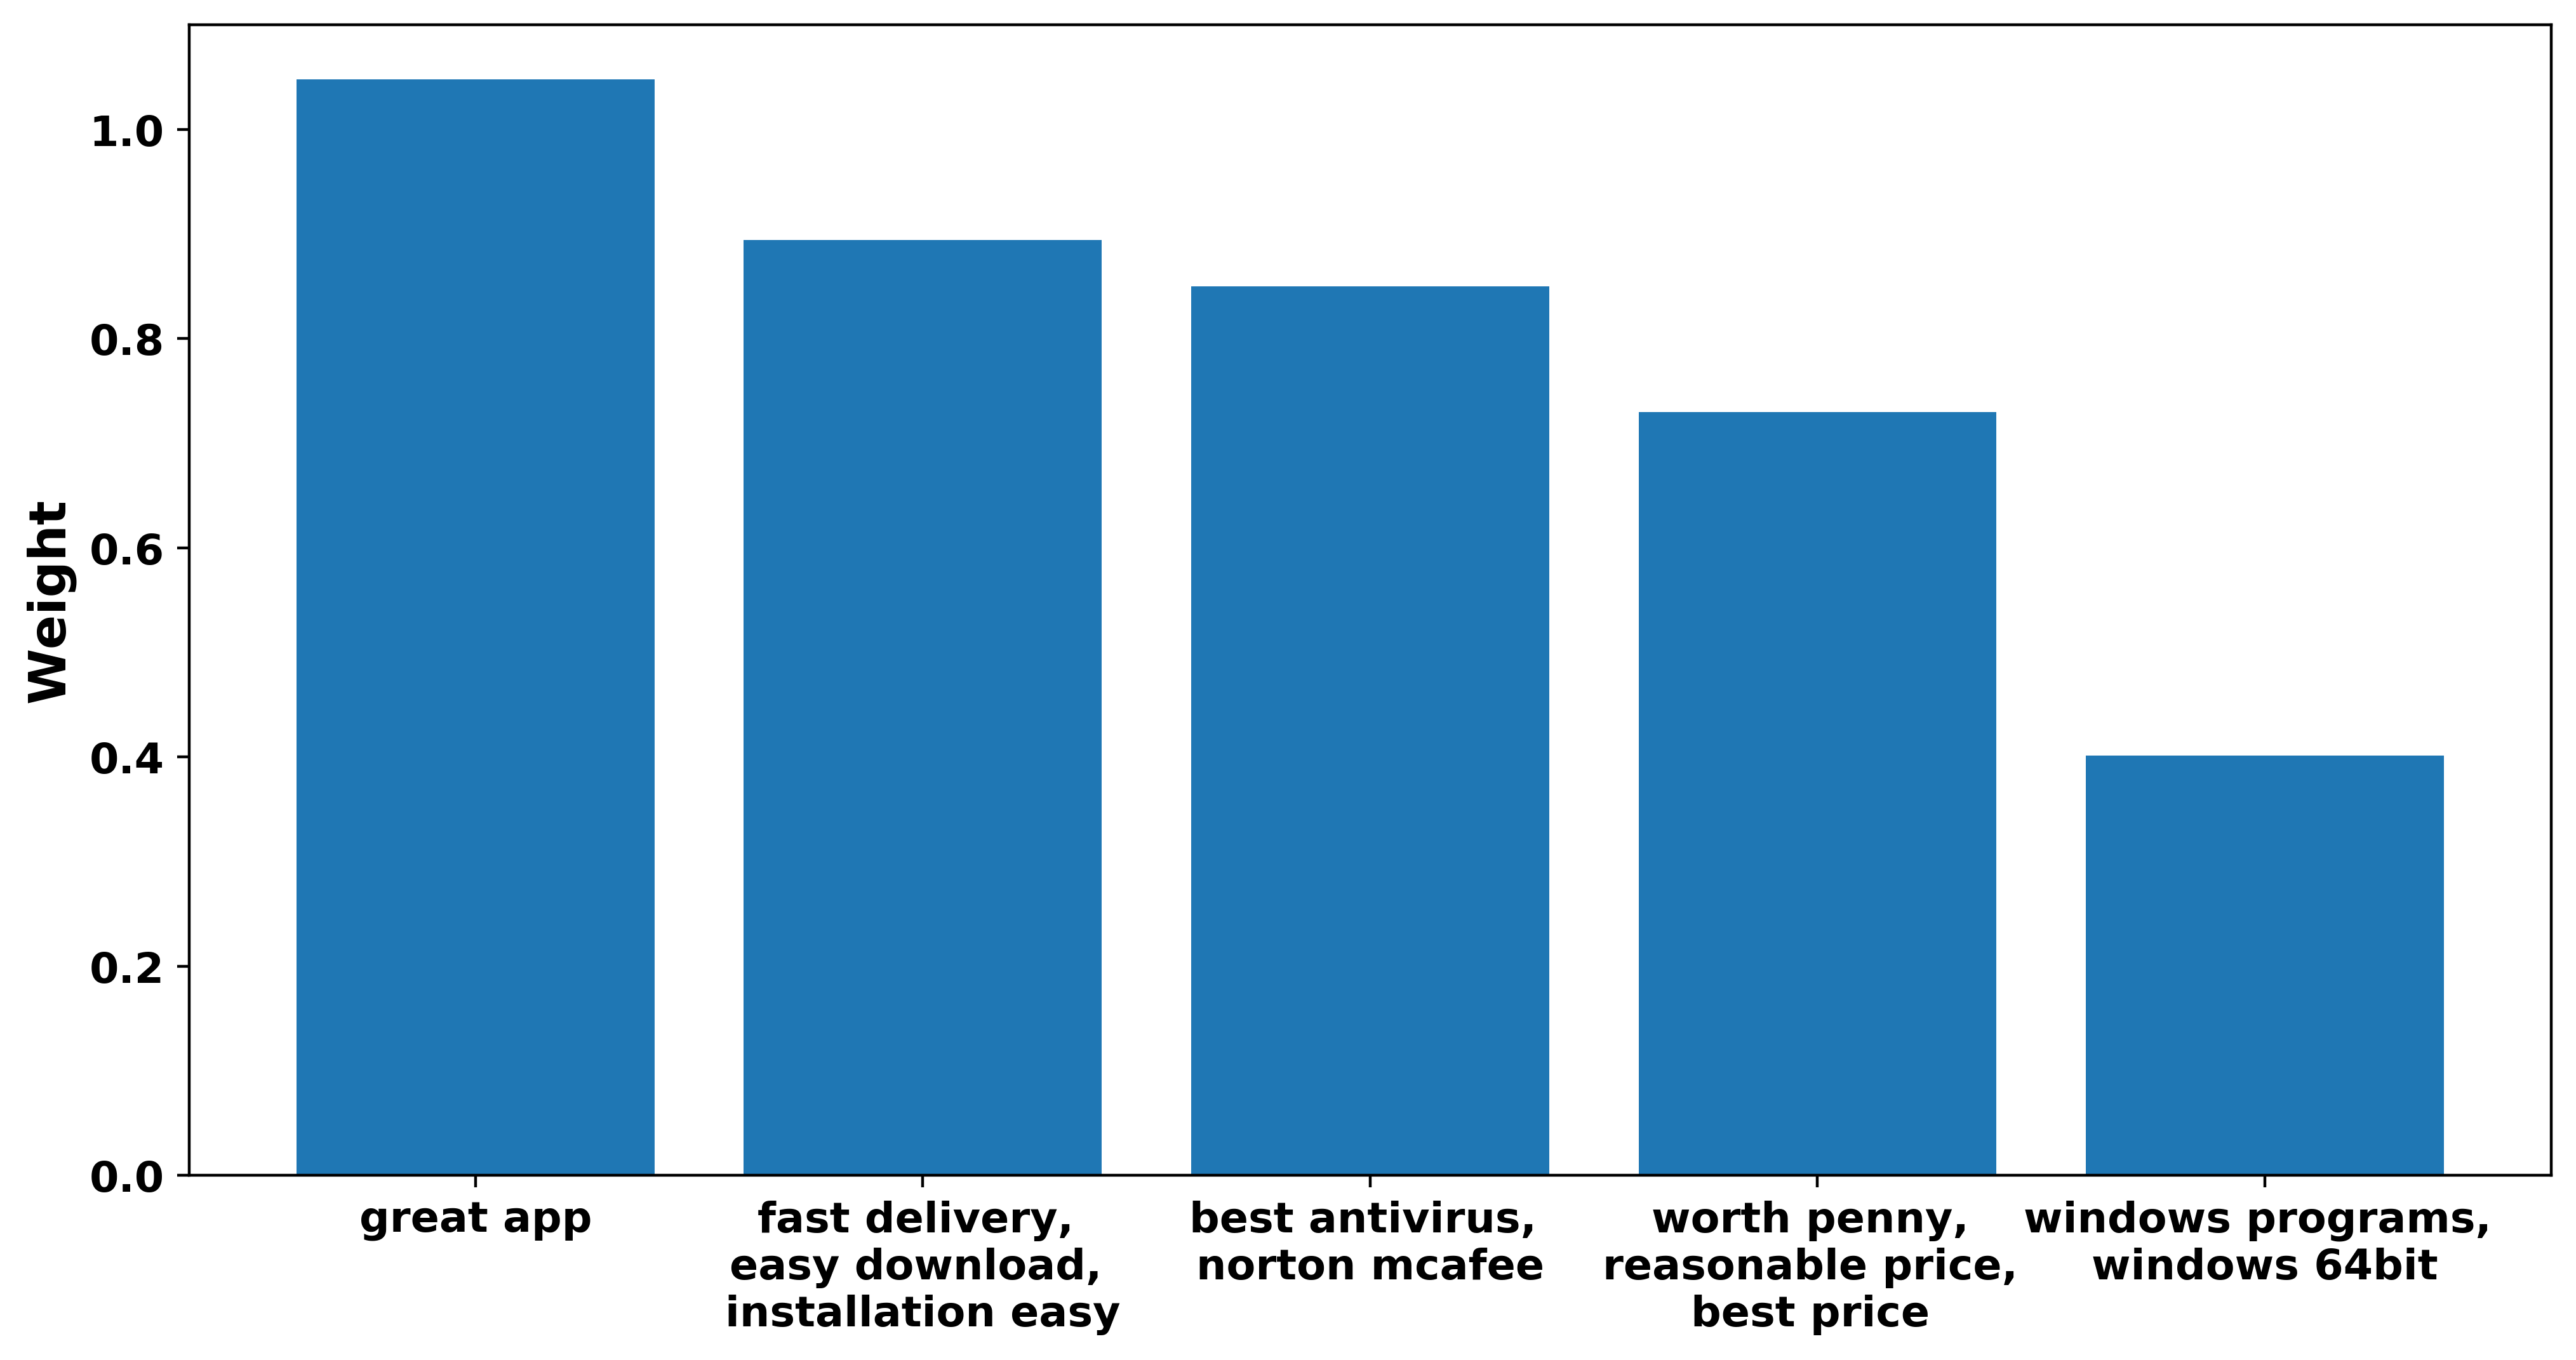

In [303]:
selected_list = ['great app', 'fast delivery', 'best antivirus', 'worth penny', 'windows programs']
ticks = ['great app', 'fast delivery, \neasy download, \ninstallation easy', 'best antivirus, \nnorton mcafee','worth penny, \nreasonable price, \nbest price ' , 'windows programs, \nwindows 64bit']
ticks_dic = {i:ticks[idx] for idx, i in enumerate(selected_list)}
selected_list.sort(key=lambda x: abs(tmp_pair[x]), reverse=True)
print(selected_list)
coef = [abs(tmp_pair[i]) for i in selected_list]
fig = plt.figure(figsize=(12, 6))
x=np.array([])
y=np.array([])
#fig.patch.set_alpha(0);
#ax = fig.add_subplot(111)
#ax.patch.set_alpha(0);
plt.bar([ticks_dic[i] for i in selected_list], coef)
#plt.title('Top 10 important words for analysis and recommendation', color="white")
plt.ylabel('Weight',weight = 'bold')
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.show()

#######################

In [167]:
countsUnigram = [(uni_count[w], w) for w in uni_count]
countsUnigram.sort()
countsUnigram.reverse()

In [168]:
unigrams = [x[1] for x in countsUnigram[:1000]]
unigramId = dict(zip(unigrams, range(len(unigrams))))
unigramSet = set(unigrams)

In [169]:
def feature_2(text, unigrams, unigramId):
    feat = [0]*len(unigrams)
    words = text.split()
    for i in words:
        #bigram = words[i] + " " + words[i+1]
        try:
            feat[unigramId[i]] += 1
        except KeyError:
            continue
    feat.append(1) #offset
    return feat

In [170]:
def feature_3(text):
    feat = [0]*len(combineds)
    words = text.split()
    for i in range(len(words)-1):
        bigram = words[i] + " " + words[i+1]
        try:
            feat[combinedId[bigram]] += 1
        except KeyError:
            continue
    for w in words:
        try:
            feat[combinedId[w]] += 1
        except KeyError:
            continue
    feat.append(1) #offset
    return feat

In [171]:
X_uni = []
for i in range(len(all_data)):
    X_uni.append(feature_2(review_text[i], unigrams, unigramId))
y_uni = [d['overall'] for d in all_data]

In [172]:
print(len(X_uni), len(y_uni))

60000 60000


In [173]:
reg = 1.0
clf_uni = linear_model.Ridge()
clf_uni.fit(X_uni, y_uni)
theta_uni = clf_uni.coef_
pred_uni = clf_uni.predict(X_uni)

In [174]:
max_index = np.argsort(theta_uni)[-200:][::-1]
print(len(theta_uni[max_index]))
#print(np.array(bigrams)[max_index - 1])
tmp_uni = np.array(unigrams)[max_index - 1]
print(tmp_uni)
count_pair = [(i, uni_count[i]) for i in tmp_uni]
print(count_pair)

200
['ease' 'bad' 'range' 'star' 'voice' 'computer' 'payroll' 'true'
 'ridiculous' 'project' 'huge' 'willing' 'new' 'default' 'office'
 'powerpoint' 'filing' 'normal' 'flash' 'cost' 'potential' 'front'
 'helpful' 'numerous' 'designer' 'reading' 'driver' 'disappointing' 'cd'
 'kindle' 'sense' 'characters' 'charge' 'recovery' 'paint' 'option'
 'familiar' 'images' 'fault' 'seller' 'store' 'backups' 'videos' 'content'
 'password' 'test' 'trial' 'crap' 'calendar' 'improvement' 'cable' 'parts'
 'joke' 'impossible' 'cpu' 'bonus' 'digital' 'sound' 'sync' 'music'
 'roxio' 'browser' 'years' 'math' 'cds' 'house' 'difference' 'age'
 'effort' 'interface' 'dos' 'section' 'services' 'areas' 'navigation'
 'message' 'language' 'great' 'art' 'tracks' 'rebate' 'chat' 'room'
 'commands' 'knowledge' 'hr' 'solutions' 'run' 'keys' 'irs' 'list'
 'stable' 'raw' 'sony' 'points' 'control' 'disappointment' 'longer'
 'laptops' 'box' 'websites' 'terrible' 'total' 'tree' 'purpose' 'items'
 'tab' 'limited' 'load' 'ha

##### get low ratting data ####

In [136]:
########################################
#   not using for now                  #
########################################

# def get_bigrams(all_data, count):
#     bigramCount = defaultdict(int)
#     punctuation = set(string.punctuation)
#     for d in all_data:
#         r = ''.join([c for c in d['reviewText'].lower() if not c in punctuation])
#         words = r.split()
#         for i in range(0,len(words)-1):
#             bigram = words[i] + " " + words[i+1]
#             bigramCount[bigram] += 1
#     countsBigram = [(bigramCount[d], d) for d in bigramCount.keys()]
#     countsBigram.sort()
#     countsBigram.reverse()
#     bigrams = [c[1] for c in countsBigram[:count]]
#     bigramId = dict(zip(bigrams, range(len(bigrams))))
#     bigramSet = set(bigrams)
#     return bigramId, bigramSet, countsBigram

# def get_unigrams(all_data, count):
#     unigramCount = defaultdict(int)
#     for d in all_data:
#         r = ''.join([c for c in d['reviewText'].lower() if not c in punctuation])
#         for w in r.split():
#             unigramCount[w] += 1
#     countsUnigram = [(unigramCount[w], w) for w in unigramCount]
#     countsUnigram.sort()
#     countsUnigram.reverse()
#     unigrams = [x[1] for x in countsUnigram[:count]]
#     unigramId = dict(zip(unigrams, range(len(unigrams))))
#     unigramSet = set(unigrams)
#     return unigramId, unigramSet, countsUnigram

# def get_training_data(all_data, review_text):
#     X = []
#     for i in range(len(all_data)):
#         X.append(feature_3(review_text[i]))
#     y = [d['overall'] for d in all_data]
#     return X, y

In [175]:
def data_by_rating(all_data, rating):
    ratings_data = []
    for d in all_data:
        if d['overall'] == rating:
            ratings_data.append(d)
    #print(len(ratings_data))
    return ratings_data

low_ratings = data_by_rating(all_data, 1.0)
#reviewText_low = [''.join([c for c in datum['reviewText'].lower() if not c in punctuation]) for datum in low_ratings]

In [176]:
low_uni_count, low_bi_count, low_reviews = only_adj_and_noun(low_ratings)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000


In [177]:
low_uni_count, low_bi_count = Counter(low_uni_count), Counter(low_bi_count)

In [178]:
print(low_uni_count.most_common(50))

[('software', 7267), ('product', 6233), ('program', 4780), ('version', 4333), ('computer', 3897), ('time', 3855), ('support', 3541), ('windows', 3498), ('money', 2739), ('new', 2663), ('years', 2373), ('quicken', 2324), ('problem', 2094), ('year', 1704), ('customer', 1701), ('system', 1617), ('many', 1610), ('good', 1601), ('way', 1523), ('mac', 1508), ('amazon', 1481), ('microsoft', 1457), ('problems', 1447), ('hours', 1361), ('tax', 1356), ('intuit', 1338), ('service', 1323), ('user', 1253), ('company', 1234), ('pc', 1223), ('free', 1185), ('tech', 1171), ('old', 1135), ('norton', 1098), ('nothing', 1096), ('able', 1087), ('file', 1079), ('refund', 1059), ('data', 1051), ('turbotax', 1039), ('files', 1023), ('help', 979), ('times', 960), ('error', 958), ('email', 941), ('first', 932), ('last', 918), ('something', 915), ('days', 915), ('business', 906)]


In [179]:
print(low_bi_count.most_common(50))

[('tech support', 862), ('customer service', 711), ('turbo tax', 479), ('customer support', 432), ('waste money', 374), ('hard drive', 325), ('credit card', 279), ('new version', 276), ('technical support', 251), ('product key', 244), ('operating system', 240), ('new computer', 234), ('last year', 234), ('error message', 210), ('time money', 200), ('many years', 199), ('internet security', 199), ('first time', 197), ('rosetta stone', 190), ('waste time', 186), ('long time', 170), ('web site', 166), ('last years', 164), ('user friendly', 162), ('next year', 159), ('windows windows', 156), ('several times', 156), ('serial number', 155), ('older version', 139), ('brand new', 138), ('previous version', 138), ('piece software', 131), ('version quicken', 130), ('bottom line', 128), ('old version', 128), ('software software', 127), ('software computer', 126), ('previous versions', 121), ('trial version', 120), ('tax software', 119), ('user interface', 115), ('version windows', 114), ('phone n

['great app', 'fast delivery', 'best antivirus', 'worth penny', 'office software']


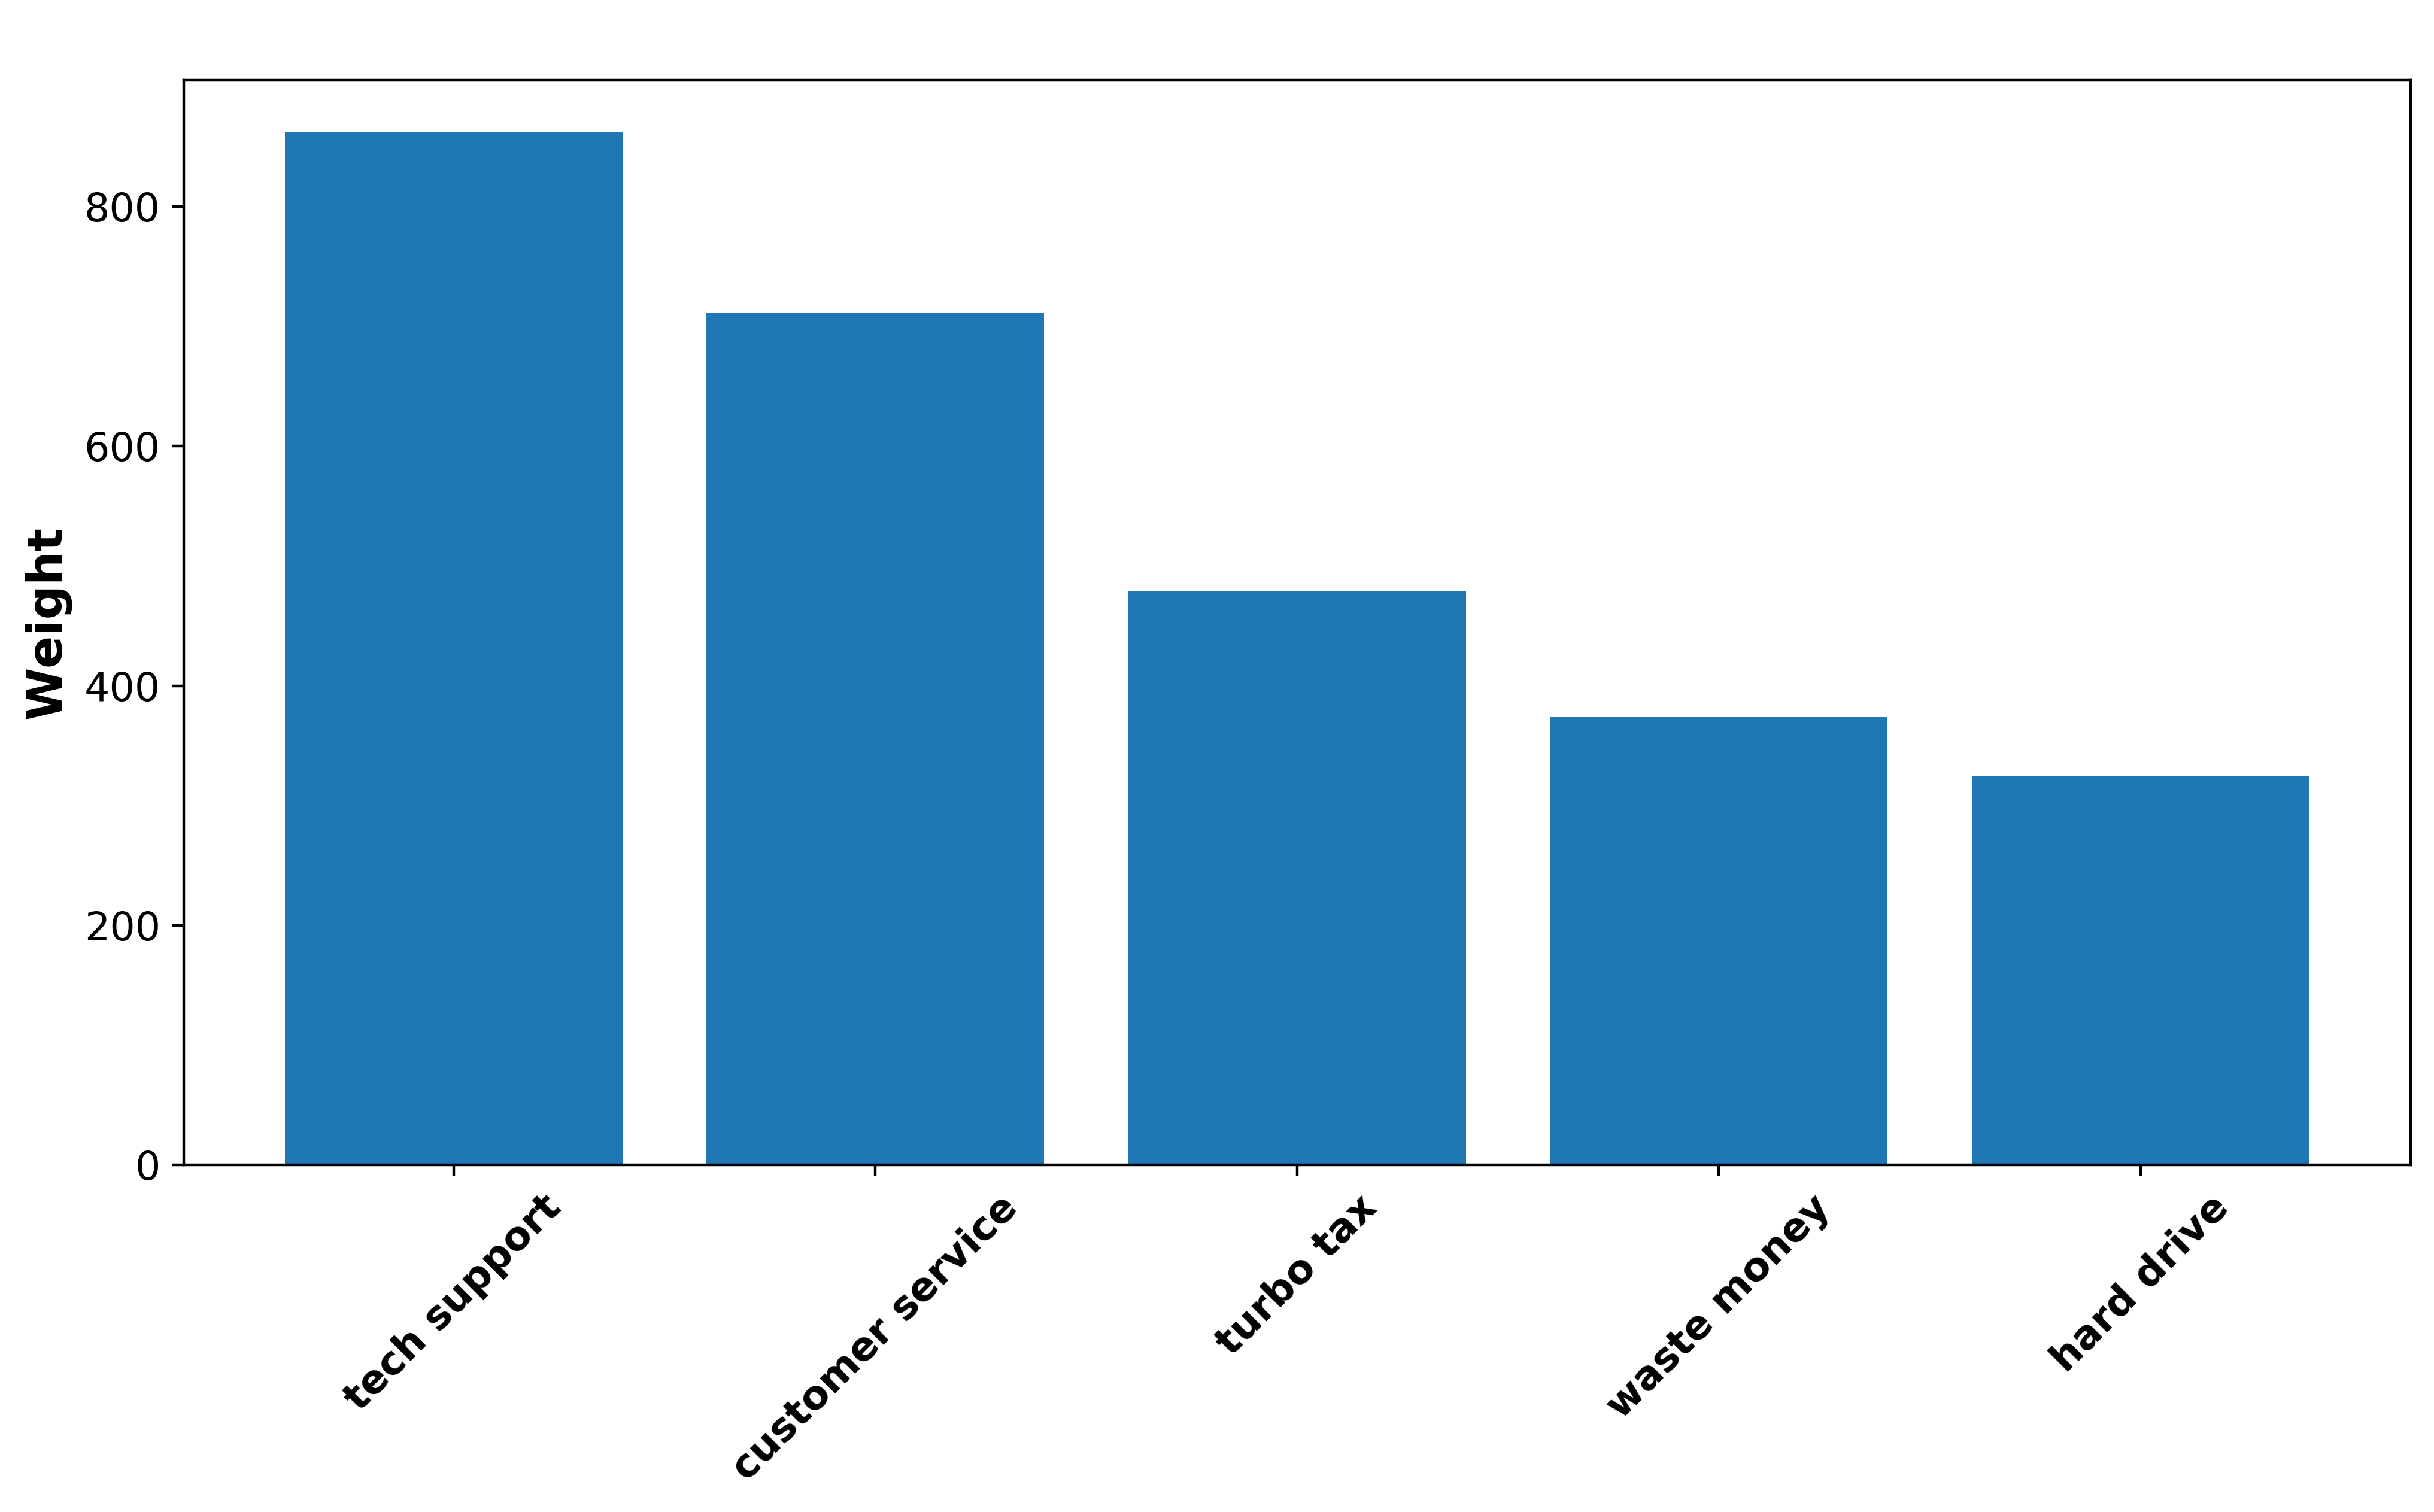

In [301]:
low_selected = ['tech support','turbo tax', 'customer service', 'hard drive', 'waste money']
#low_pair = 
low_selected.sort(key=lambda x: low_bi_count[x], reverse=True)
print(selected_list)
coef = [low_bi_count[i] for i in low_selected]
fig = plt.figure(figsize=(12, 6))
x=np.array([])
y=np.array([])
#fig.patch.set_alpha(0);
ax = fig.add_subplot(111)
#ax.patch.set_alpha(0);
plt.bar(low_selected,coef)
plt.title('Top 5 most important words for low rating', color="white", weight='bold')
plt.ylabel('Weight', weight="bold")
plt.xticks(rotation=45, weight="bold")
plt.show()

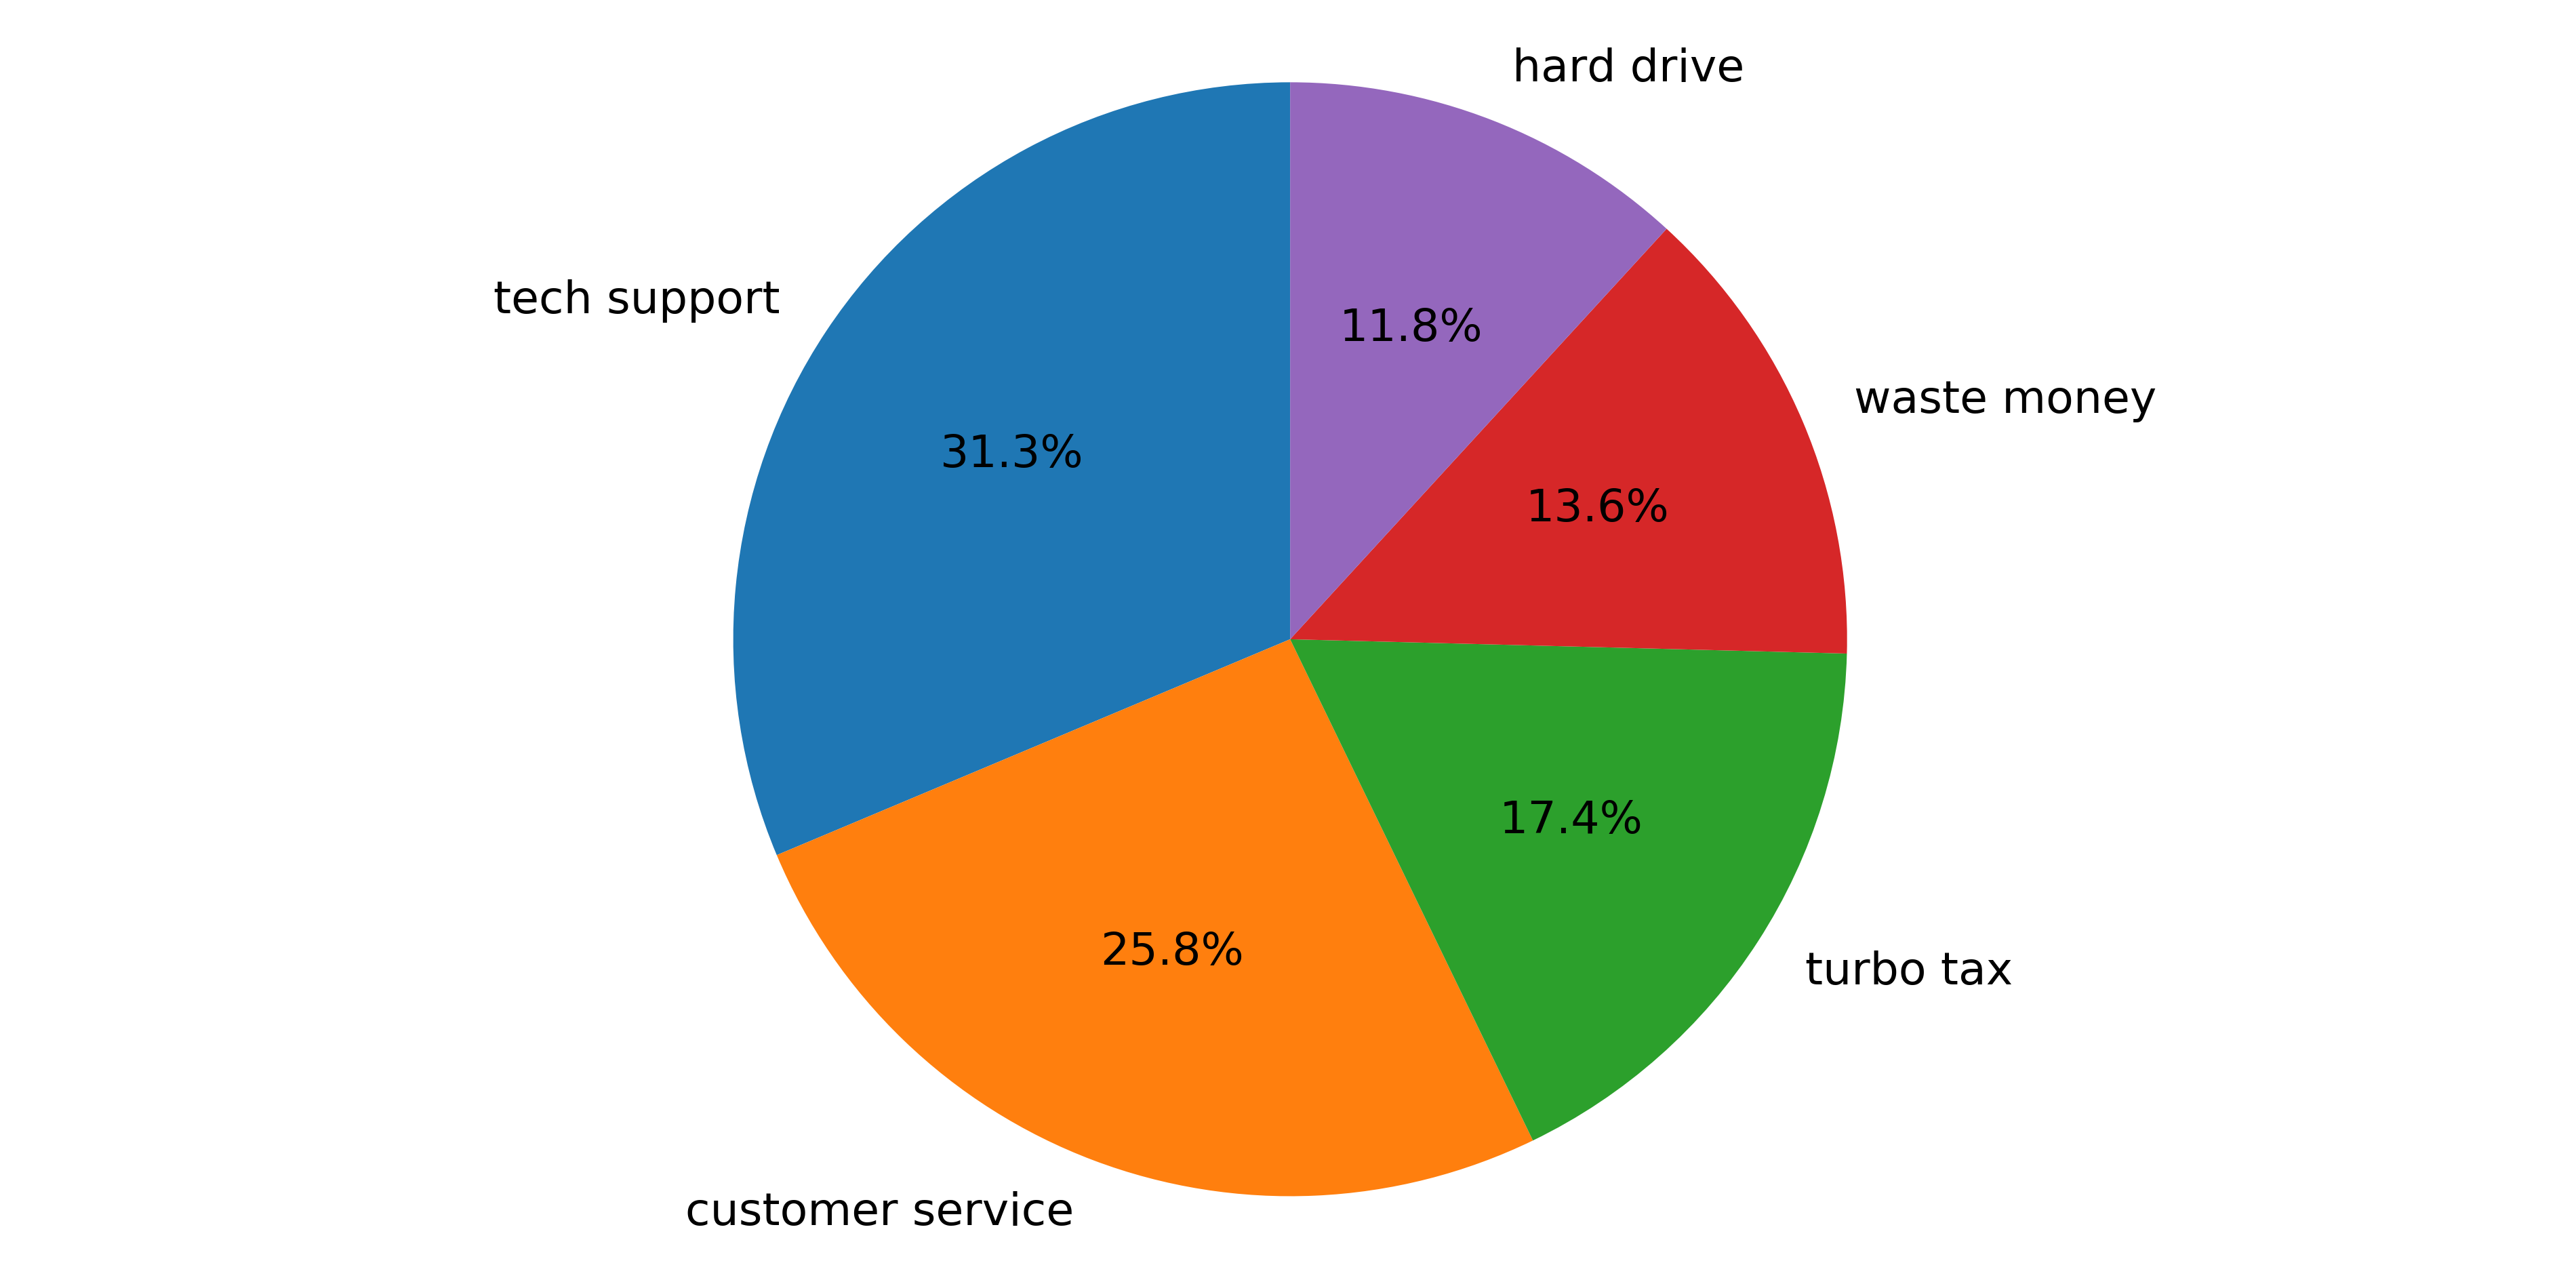

In [302]:
matplotlib.rcParams['text.color'] = 'k'
fig1 = plt.figure(figsize=(12, 6))
#fig1, ax1 = plt.subplots()
#fig1.patch.set_alpha(0);
ax1 = fig1.add_subplot(111)
#ax1.patch.set_alpha(0);
wedges ,texts, _ = ax1.pie(coef, labels=low_selected, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color("k")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [305]:
hard_drive = []
for i in review_text:
    if 'hard drive' in i:
        print(i + "\n")

computer windows windows pro bit oct best acronis version version useful problems new computer new installation win previous compatible programs acronis disaster try module file recovery problems disabled hibernation mode able uninstall acronis tech support workable remedy try test complex software installation sure corel videostudio x6 hard drive unbootable changes hard drive fresh acronis backup procedure acronis full restore hard drive try itch correct procedure version simple easy major fail several hours frigging restore acronis backup image valid pc hard drive trashed pc acronis recovery cd useless system image restore acronis system recovery cd computer restore bios uefi boot mode uefi boot mode win hard drives tb larger system screen gibberish program prompts nonsense monitor bios uefi boot normal cd acronis utilities list choices monitor resolution nuts version right choice color resolution bit bit hassle solution computer acronis free builtin windows backup system image utili


mix utilitiesprograms problems whole system buggy install incompatibility ghost goback ghost proper way different ideas heres pc fantastic screaming dell image file ghost 2nd hard disk norton goback goback points ghost control possibility user program files something ghost deletion many goback points recovery cd ghosts recovery environment things ghost goback recovery points norton mess dell computers system recovery kind mess computer way things way computer new apps data files hours things systemworks premier custom install ghost images file 2nd hard drive individual folders files nice dell normal new image file ghost thing next time accessible image file entire cdrive hard drive programs systemworks speed disk defragmenter worst utilities older versions speed disk bad one terrible analysis user account example account finished wifes run manual analysis wifes account map grid mess things fact defrag half hour gigs info accounts administrators much info place net delete temp files ju

In [181]:
print(high_uni_count.most_common(50))

[('software', 7767), ('great', 7300), ('product', 6555), ('program', 6087), ('easy', 5710), ('years', 4668), ('version', 4271), ('computer', 4182), ('good', 4160), ('time', 4151), ('windows', 4011), ('new', 3659), ('year', 2780), ('price', 2560), ('best', 2444), ('many', 2428), ('tax', 2371), ('norton', 2054), ('way', 1955), ('old', 1800), ('system', 1771), ('problems', 1750), ('free', 1689), ('programs', 1672), ('lot', 1655), ('able', 1641), ('game', 1638), ('user', 1635), ('pc', 1617), ('better', 1605), ('features', 1597), ('everything', 1594), ('excellent', 1580), ('mac', 1539), ('office', 1422), ('microsoft', 1359), ('video', 1330), ('problem', 1305), ('simple', 1276), ('security', 1272), ('amazon', 1246), ('home', 1230), ('little', 1227), ('money', 1193), ('things', 1175), ('files', 1175), ('first', 1172), ('word', 1160), ('happy', 1145), ('taxes', 1132)]


In [182]:
print(high_bi_count.most_common(50))

[('turbo tax', 1005), ('great product', 947), ('many years', 485), ('hard drive', 455), ('year old', 407), ('user friendly', 401), ('internet security', 371), ('great price', 367), ('several years', 348), ('good product', 341), ('great program', 293), ('customer service', 290), ('first time', 288), ('microsoft office', 275), ('last years', 271), ('operating system', 266), ('excellent product', 255), ('long time', 253), ('program easy', 245), ('new version', 244), ('new computer', 236), ('product great', 235), ('last year', 235), ('good price', 229), ('great software', 228), ('new features', 221), ('product easy', 213), ('software easy', 203), ('learning curve', 199), ('windows windows', 198), ('next year', 184), ('tax software', 180), ('software years', 174), ('rosetta stone', 172), ('tech support', 167), ('ms office', 165), ('great deal', 165), ('small business', 160), ('easy easy', 159), ('worth money', 159), ('product key', 153), ('tax years', 152), ('software great', 151), ('antivi